# CASE STUDY ON UNSUPERVISED LEARNING
The Whole sale customer data is given

1.Read the dataset to the python environment.

2.Try out different clustering models in the Whole sale customer dataset.

3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

4.Perform PCA for Dimensionality reduction

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supressing warnings
import warnings
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [3]:
df = pd.read_csv(r"C:\Users\indup\Downloads\Wholesale customers data.csv")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Channel'),
  Text(2, 0, 'Region'),
  Text(3, 0, 'Fresh'),
  Text(4, 0, 'Milk'),
  Text(5, 0, 'Grocery'),
  Text(6, 0, 'Frozen'),
  Text(7, 0, 'Detergents_Paper'),
  Text(8, 0, 'Delicassen')])

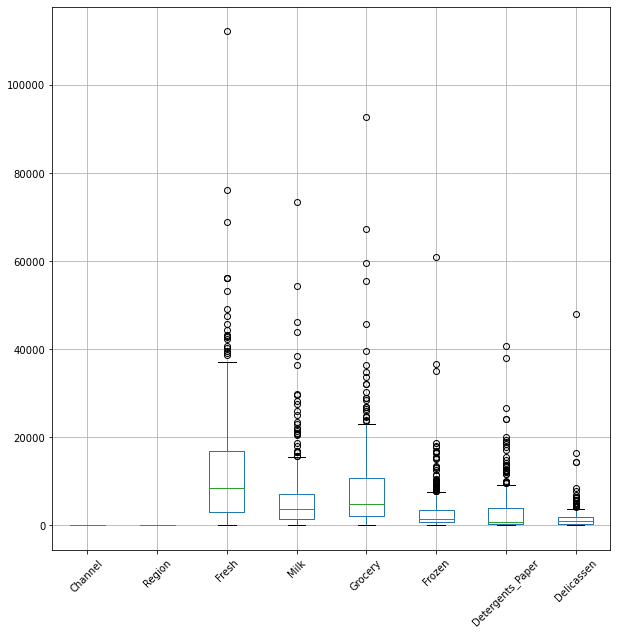

In [7]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.xticks(rotation=45)

## **Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [9]:
# MinMax Normalization
minmax = MinMaxScaler()
X = minmax.fit_transform(df)

In [10]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2.Try out different clustering models in the Whole sale customer dataset.

# 3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

KMeans Clustering

In [11]:
from sklearn.cluster import KMeans

1 Clusters : 186.8918581410292
2 Clusters : 85.11692833765339
3 Clusters : 41.73172344212006
4 Clusters : 26.54289783198761
5 Clusters : 21.746762042487152
6 Clusters : 17.668755555276356
7 Clusters : 15.371441709399218
8 Clusters : 12.821378336622946
9 Clusters : 11.14545838335345
10 Clusters : 10.148632928251617


Text(0, 0.5, 'Inertia or SSE')

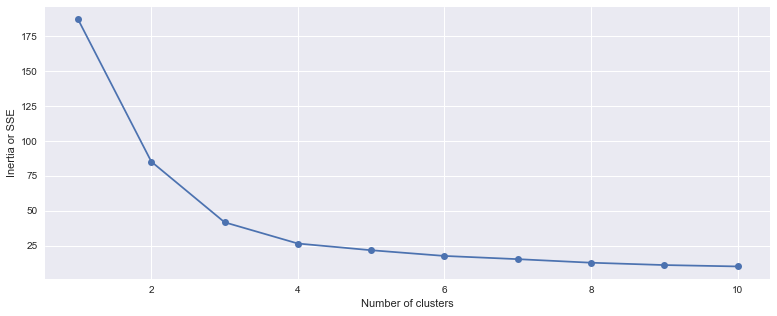

In [12]:
clusters = range(1, 11)
wcss = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
    print(cluster, "Clusters :", model.inertia_)

plt.style.use("seaborn")
plt.subplots(figsize=(13, 5))
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')

The optimum number of clusters is 3

Silhouette Score

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5928657922516165
For n_clusters = 3 The average silhouette_score is : 0.6593155081294824
For n_clusters = 4 The average silhouette_score is : 0.679962733411163
For n_clusters = 5 The average silhouette_score is : 0.6468088170046818
For n_clusters = 6 The average silhouette_score is : 0.6534663865655432
For n_clusters = 7 The average silhouette_score is : 0.6430667225641463
For n_clusters = 8 The average silhouette_score is : 0.5859780635571717
For n_clusters = 9 The average silhouette_score is : 0.5725629454671356
For n_clusters = 10 The average silhouette_score is : 0.5264662208022017


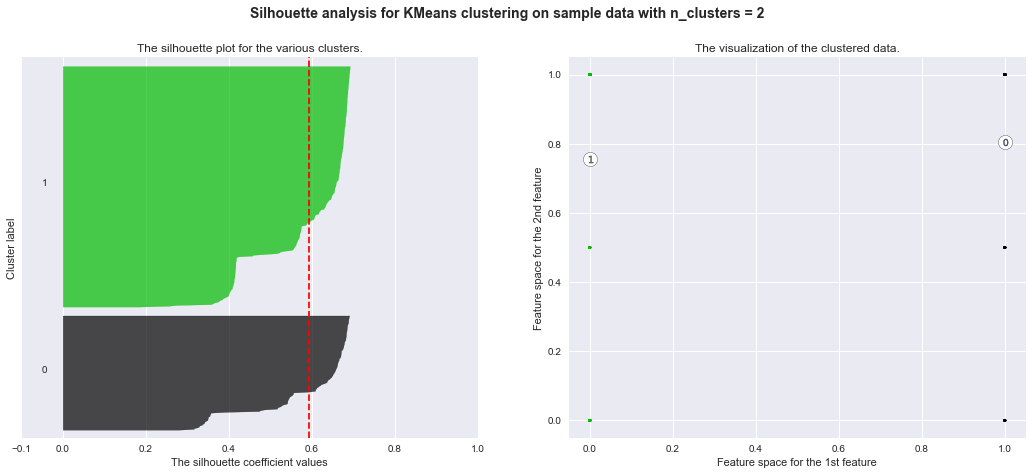

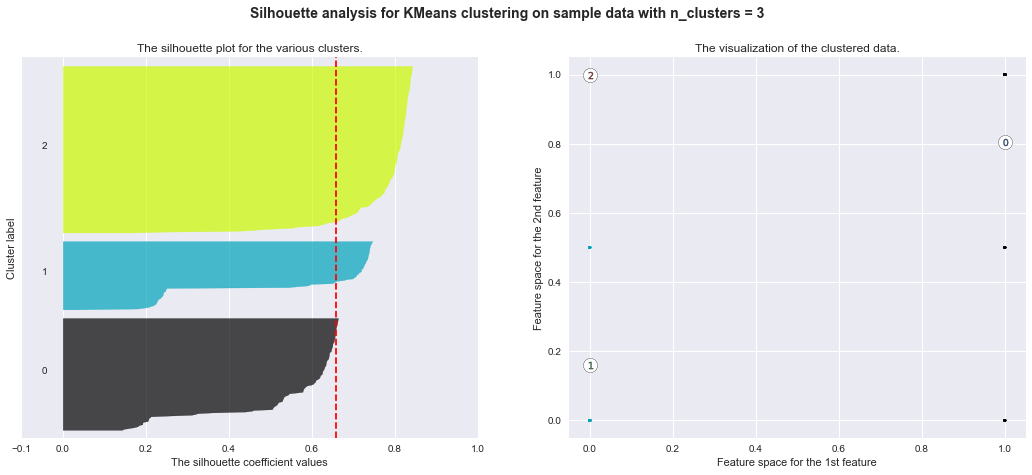

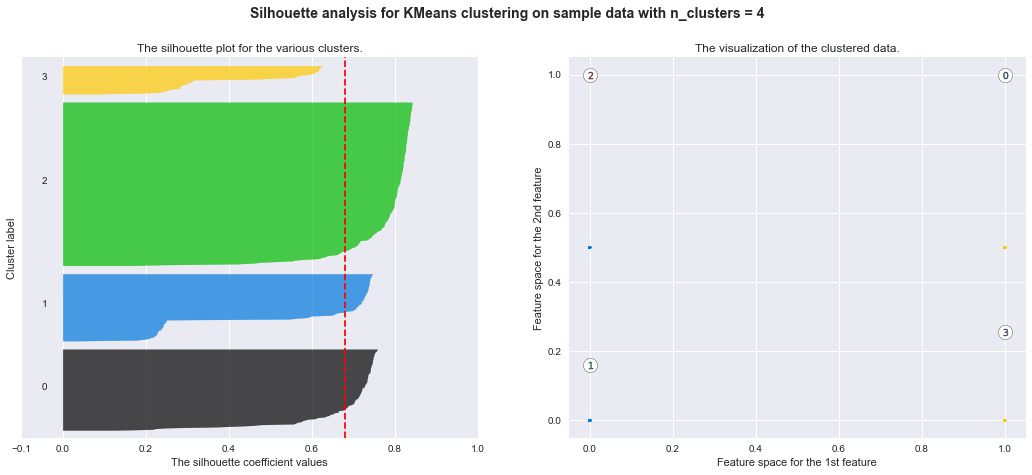

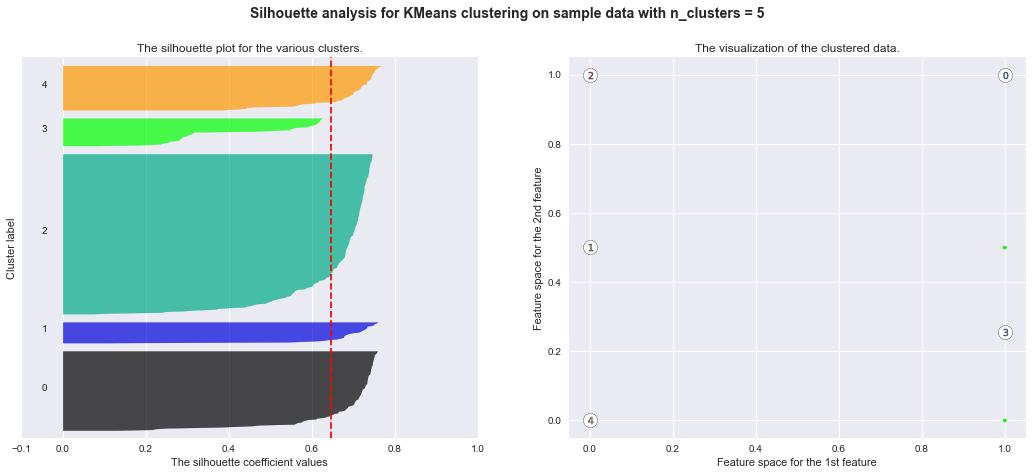

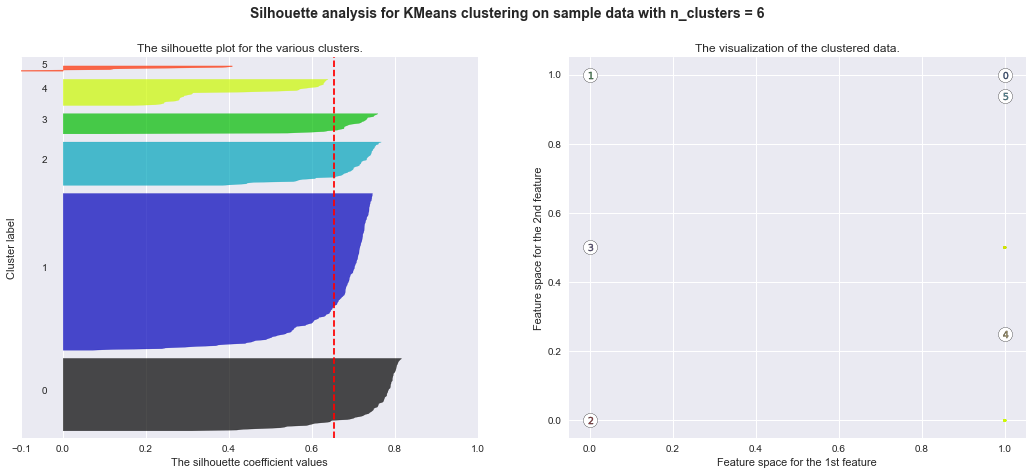

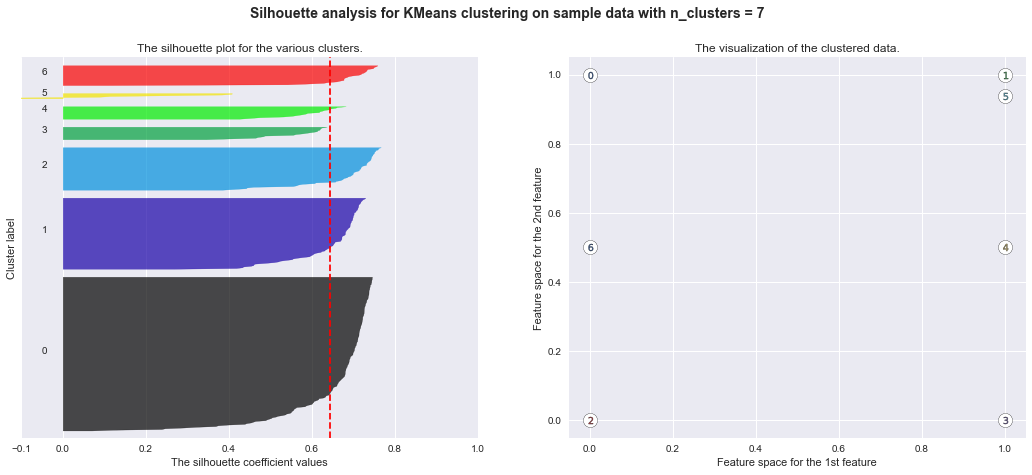

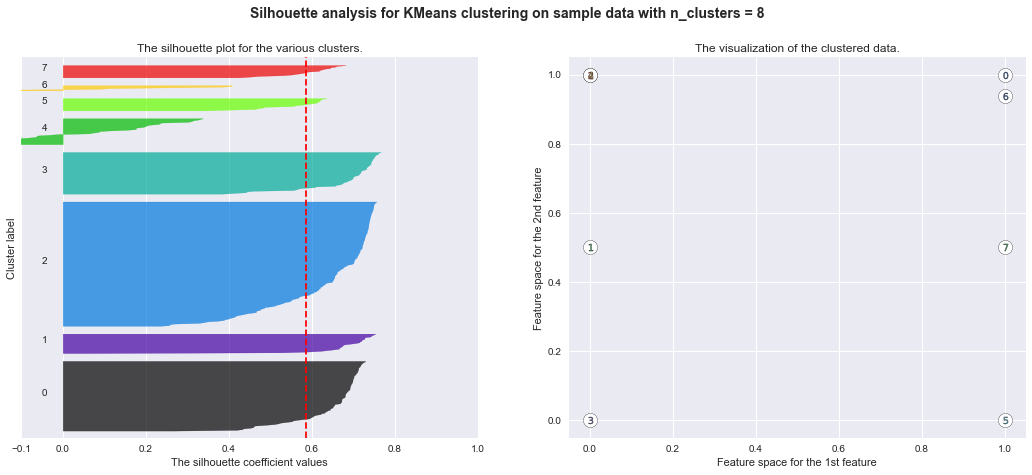

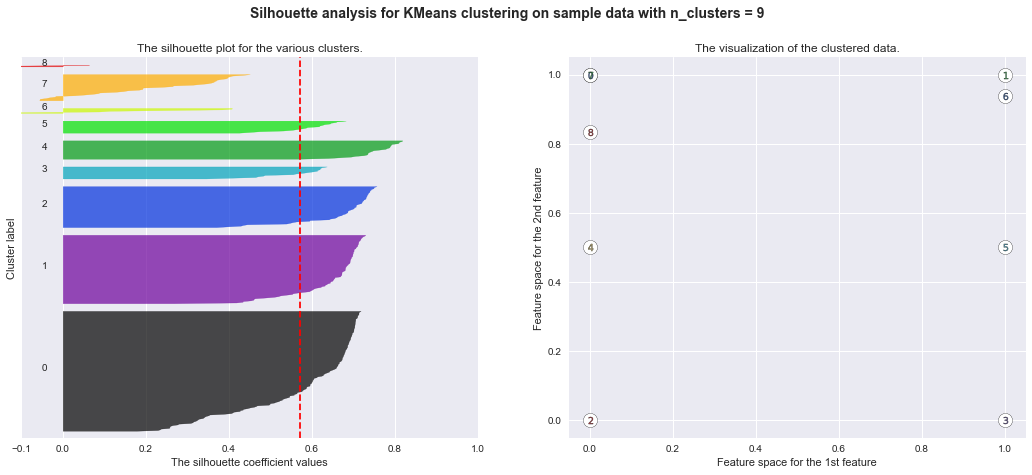

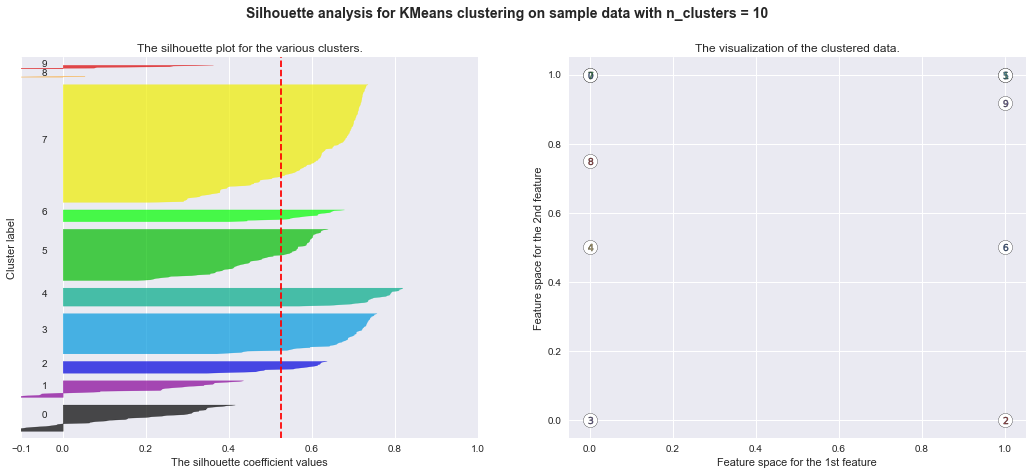

In [14]:
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**The elbow method shows 3 as the optimum no.of cluster, but the silhouette score for 4 number of clusters is the highest. So 4 is decided for the number of clusters for KMeans.**

In [15]:
model = KMeans(n_clusters=4)
y_kmeans = model.fit_predict(X)
print(y_kmeans)

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1
 1 2 2 1 2 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 1 2 2 0 3 0 0 3 3 0 0 0 3 0 3 0 3 0 3 0 0 3 0 3 0 3 0 0 0
 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0
 3 3 3 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


Hierarchical Clustering

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

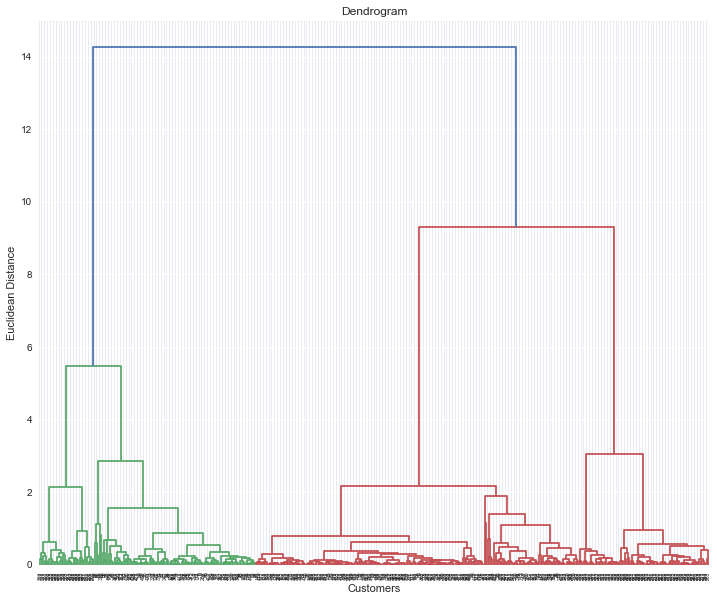

In [17]:
plt.figure(figsize=(12,10))
dendrogram(linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

**The optimum number of clusters is 4**

In [18]:
from sklearn.cluster import AgglomerativeClustering

Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.5928657922516165
For n_clusters = 3 The average silhouette_score is : 0.6586632301355246
For n_clusters = 4 The average silhouette_score is : 0.6779590999021476
For n_clusters = 5 The average silhouette_score is : 0.6370216129571665
For n_clusters = 6 The average silhouette_score is : 0.6470603223672511
For n_clusters = 7 The average silhouette_score is : 0.5446820326640022
For n_clusters = 8 The average silhouette_score is : 0.5302850978194175
For n_clusters = 9 The average silhouette_score is : 0.5282564317367737
For n_clusters = 10 The average silhouette_score is : 0.4924245690525694


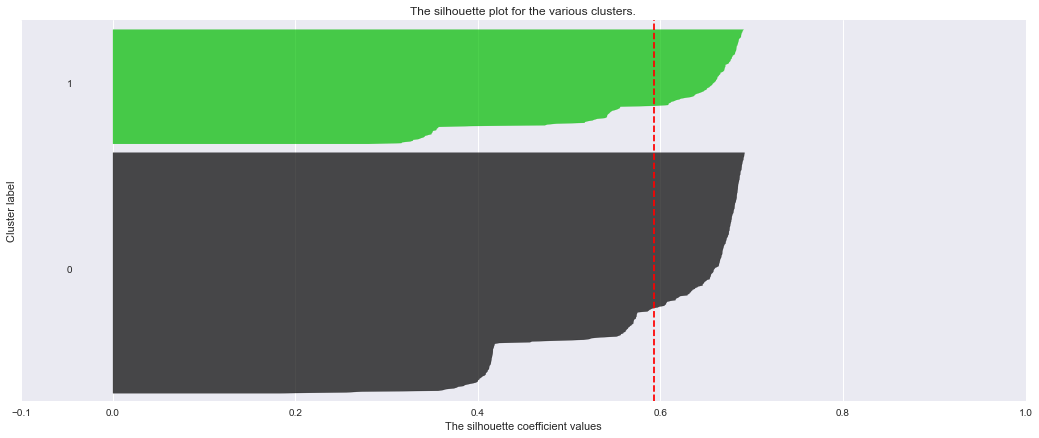

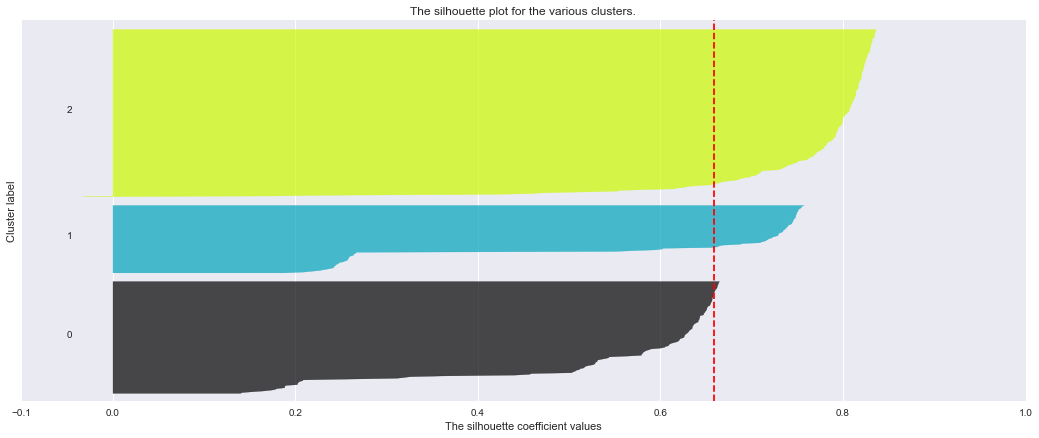

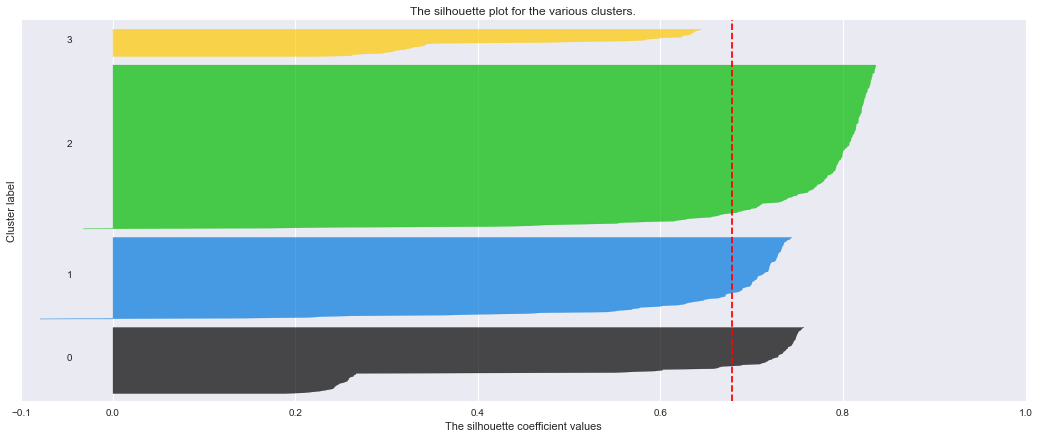

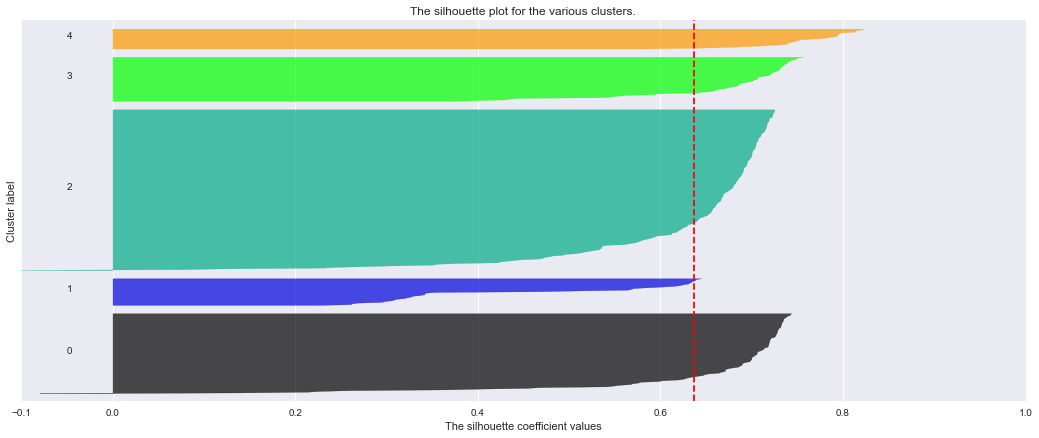

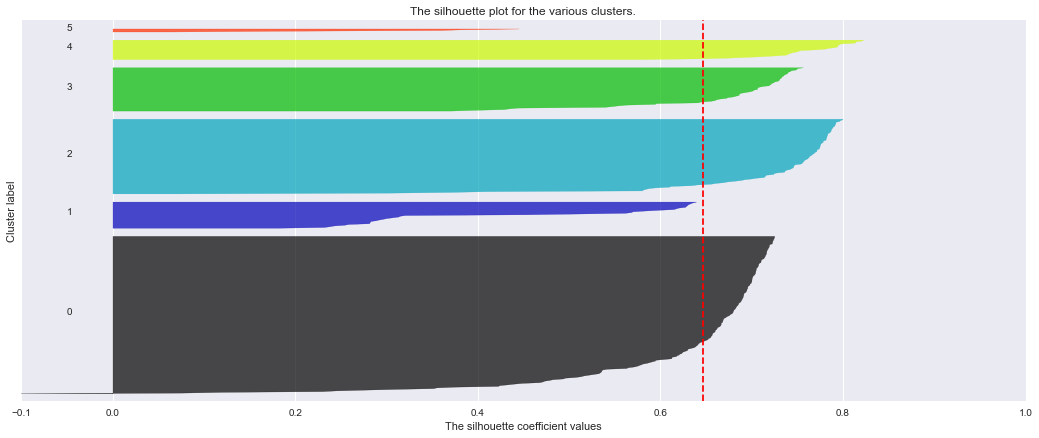

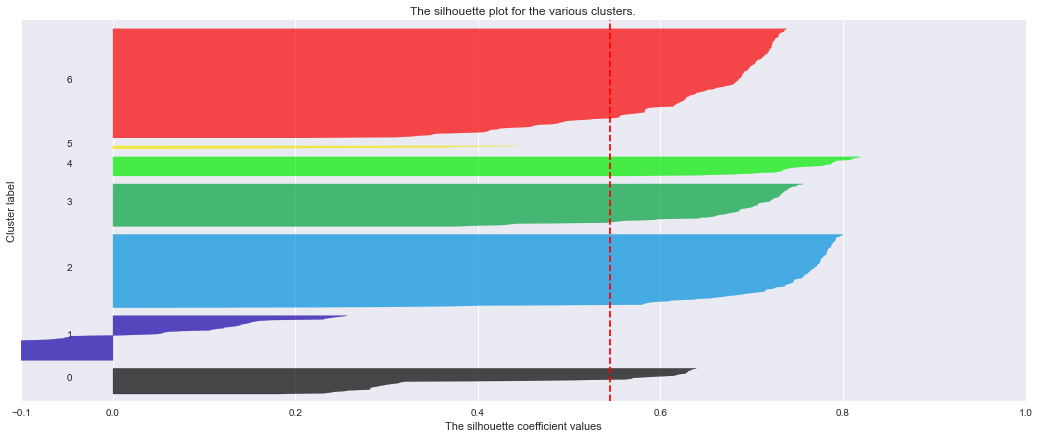

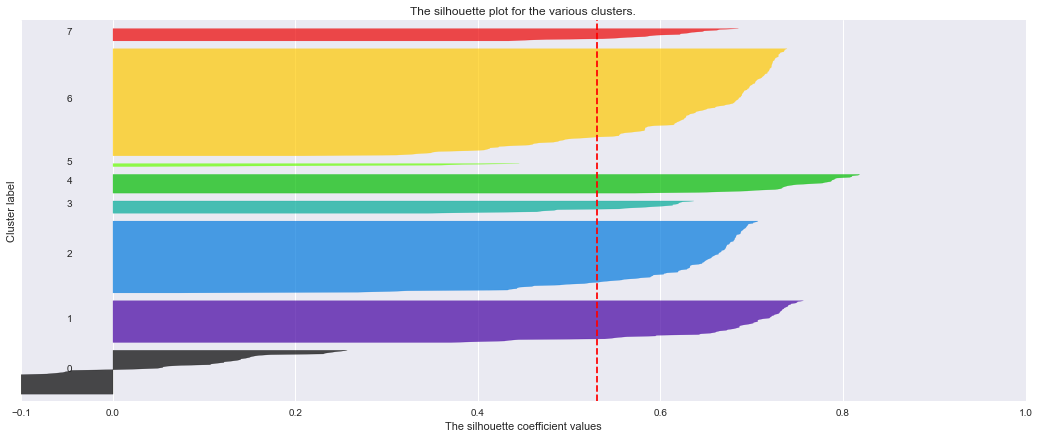

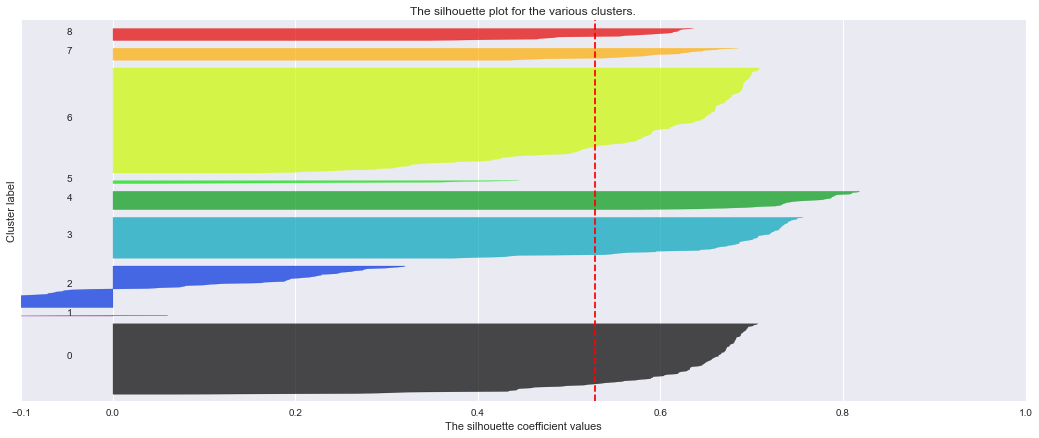

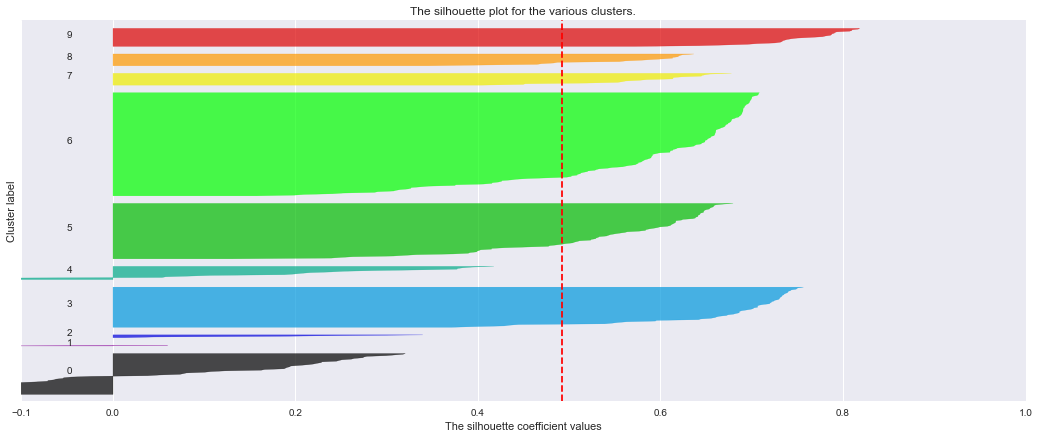

In [19]:
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**From the dendrogram we get 4 as the optimum no.of clusters, and also the silhouette score for 4 number of clusters is the highest. So 4 is decided for the number of clusters for Agglomerative Clustering.**

In [20]:
hac = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hac = hac.fit_predict(X)

In [21]:
print(y_hac)

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1
 1 2 2 1 2 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 1 2 2 0 3 0 0 3 3 0 0 0 3 0 3 0 3 0 3 0 0 3 0 3 0 3 0 0 0
 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 0
 1 3 3 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


# 4.Perform PCA for Dimensionality reduction

In [22]:
X=pd.DataFrame(X,columns=df.columns)

In [23]:
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)

In [25]:
x_pca.shape

(440, 2)

In [26]:
x_pca

array([[ 0.68616217, -0.14344337],
       [ 0.6929776 , -0.14111741],
       [ 0.69063805, -0.14221857],
       [-0.30423893, -0.27014513],
       [ 0.67129554, -0.14800675],
       [ 0.67795262, -0.14444073],
       [ 0.67791083, -0.14416853],
       [ 0.68602367, -0.14221403],
       [-0.28743028, -0.26599492],
       [ 0.72584331, -0.13437508],
       [ 0.70231319, -0.13786719],
       [ 0.66012473, -0.14776308],
       [ 0.69470076, -0.14530578],
       [ 0.7037444 , -0.14045746],
       [ 0.6981286 , -0.14298202],
       [-0.29904787, -0.26874509],
       [ 0.70303896, -0.13794761],
       [-0.29360882, -0.26808167],
       [ 0.68279653, -0.14490126],
       [-0.28180941, -0.26496058],
       [ 0.67085253, -0.14684903],
       [-0.30443371, -0.26889525],
       [-0.30272427, -0.27294163],
       [ 0.7474661 , -0.13813567],
       [ 0.69869348, -0.14299694],
       [ 0.68241612, -0.1439274 ],
       [-0.30488222, -0.26976942],
       [-0.30549265, -0.2707211 ],
       [ 0.75554321,

In [27]:
pca.explained_variance_ratio_

array([0.54880788, 0.3489064 ])

In [28]:
pd.DataFrame(pca.components_,columns=X.columns,index=['PC-1','PC-2'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.961309,0.130175,-0.038379,0.103945,0.137603,-0.033366,0.162909,0.008648
PC-2,0.121861,-0.991106,-0.026021,0.013191,0.027090,-0.002850,0.035147,-0.005501


In [29]:
#n_components=3
pca = PCA(n_components=3)
pca.fit(X)
x_pca=pca.transform(X)

In [30]:
x_pca

array([[ 0.68616217, -0.14344337, -0.10626717],
       [ 0.6929776 , -0.14111741, -0.10179424],
       [ 0.69063805, -0.14221857, -0.09214034],
       ...,
       [ 0.77594569, -0.12580099,  0.19639707],
       [-0.30340913, -0.26997382, -0.04043218],
       [-0.29943697, -0.26765313, -0.07792189]])

In [31]:
x_pca.shape

(440, 3)

In [32]:
pca.explained_variance_ratio_

array([0.54880788, 0.3489064 , 0.04377632])

In [33]:
pd.DataFrame(pca.components_,columns=X.columns,index=['PC-1','PC-2','PC-3'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.961309,0.130175,-0.038379,0.103945,0.137603,-0.033366,0.162909,0.008648
PC-2,0.121861,-0.991106,-0.026021,0.013191,0.027090,-0.002850,0.035147,-0.005501
PC-3,-0.177779,0.001231,0.425998,0.516275,0.471806,0.229218,0.457372,0.189862
